<a href="https://colab.research.google.com/github/blortle-dev/data-science-lasa/blob/main/Unit%206/ColiDicaU6Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Project

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/blortle-dev/data-science-lasa/refs/heads/main/resources/pit_stops.csv")

In [ ]:
# Get data types to make sure everything will work properly

print(data.dtypes)

hour             int64
raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object


In [ ]:
# Remove outliers (stops longer than 100 seconds) for accuracy

data = data[data["milliseconds"] < 100000]

In [ ]:
data

,hour,raceId,driverId,stop,lap,time,duration,milliseconds
0,17,841,153,1,1,17:05:23,26.898,26898
1,17,841,30,1,1,17:05:52,25.021,25021
2,17,841,17,1,11,17:20:48,23.426,23426
3,17,841,4,1,12,17:22:34,23.251,23251
4,17,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...,...
10985,16,1132,807,2,39,16:06:28,30.265,30265
10986,16,1132,840,2,39,16:06:33,29.469,29469
10987,16,1132,839,4,38,16:06:52,29.086,29086
10988,16,1132,815,4,47,16:20:38,28.871,28871


In [ ]:
# Extract the hour from each time value
try:
  data.insert(loc=0,column="hour",value=np.zeros(data.shape[0]))
except ValueError:
  print("ValueError raised, moving on...")
except Exception as e:
  raise e

ValueError raised, moving on...


In [ ]:
data['hour'] = pd.to_numeric(data['hour'])

In [ ]:
for i, item in data.iterrows():
  data.at[i, 'hour'] = round(int(item["time"][:2]))

print("Done")

Done


In [ ]:
data['hour'] = data['hour'].astype('int64')

In [ ]:
# This code took 4 hours and didn't complete

for item in data.rows:
  found = False
  foundLapLength = 0
  for reference in race_data.rows:
    if reference["raceId"] == item["raceId"]:
      found = True
      foundLapLength = reference["laps"]
      break
  if not found:
    data.drop(item)
    print("Dropped an item")
  else:
    item["lap"] = item["lap"] / foundLapLength

In [ ]:
!pip install bambi

import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
model_nbb_bmb = bmb.Model("milliseconds ~ lap", data, family = "negativebinomial")
idata_nbb_bmb = model_nbb_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

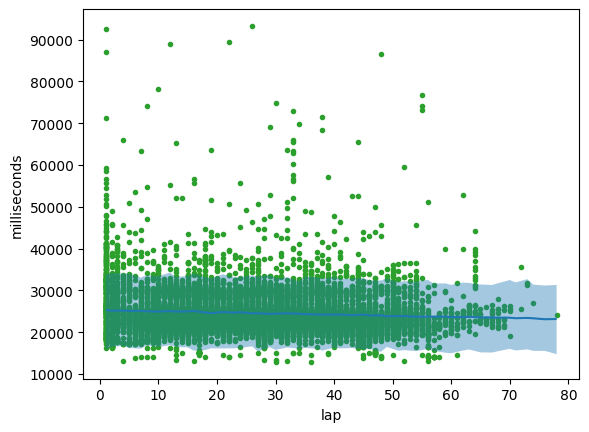

In [ ]:
bmb.interpret.plot_predictions(model_nbb_bmb, idata_nbb_bmb, "lap", pps=True)
plt.plot(data.lap, data.milliseconds, "C2.", zorder=-3)

In [ ]:
model_mlb_bmb = bmb.Model("milliseconds ~ lap + hour", data, family="negativebinomial")
idata_mlb_bmb = model_mlb_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 12 Axes>,
 array([[<Axes: title={'center': 'hour = 13'}, xlabel='lap', ylabel='milliseconds'>,
         <Axes: title={'center': 'hour = 14'}, xlabel='lap', ylabel='milliseconds'>,
         <Axes: title={'center': 'hour = 15'}, xlabel='lap', ylabel='milliseconds'>],
        [<Axes: title={'center': 'hour = 16'}, xlabel='lap', ylabel='milliseconds'>,
         <Axes: title={'center': 'hour = 17'}, xlabel='lap', ylabel='milliseconds'>,
         <Axes: title={'center': 'hour = 18'}, xlabel='lap', ylabel='milliseconds'>],
        [<Axes: title={'center': 'hour = 19'}, xlabel='lap', ylabel='milliseconds'>,
         <Axes: title={'center': 'hour = 20'}, xlabel='lap', ylabel='milliseconds'>,
         <Axes: title={'center': 'hour = 21'}, xlabel='lap', ylabel='milliseconds'>],
        [<Axes: title={'center': 'hour = 22'}, xlabel='lap', ylabel='milliseconds'>,
         <Axes: title={'center': 'hour = 23'}, xlabel='lap', ylabel='milliseconds'>,
         <Axes: xlabel='l

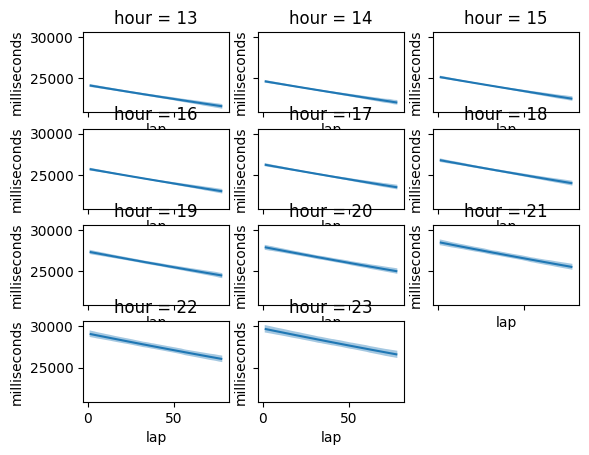

In [ ]:
bmb.interpret.plot_predictions(model_mlb_bmb, idata_mlb_bmb, ["lap", "hour"],
                               subplot_kwargs={"group":None, "panel":"hour"},
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True})

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

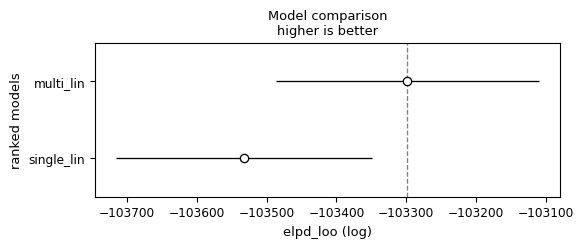

In [ ]:
cmp_df = az.compare( {"multi_lin":idata_mlb_bmb,"single_lin":idata_nbb_bmb} )

az.plot_compare(cmp_df)